In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

/content/drive/MyDrive/Colab Notebooks/New Hobby/데이터 과학을 위한 통계/practicalstatisticsfordatascientists/python


In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

#2.1 임의표본추출과 표본편향

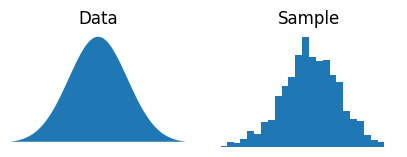

In [13]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))


ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_title('Data')

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_title('Sample')
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

##용어정리
- 표본 : 더 큰 데이터 집합으로부터 얻은 부분집합
- 모집단 : 어떤 데이터 집합을 구성하는 전체 대상 혹은 전체 집합
- N : 모집단(표본)의 크기
- 임의표본추출(임의표집, 랜덤표본추출) : 무작위로 표본을 추출하는 것
- 층화표본추출(층화표집) : 모집단을 층으로 나눈 뒤, 각 층에서 무작위로 표본을 추출하는 것
- 계층 : 공통된 특징을 가진 모집단의 동종 하위 그룹
- 단순임의표본 : 모집단 층화 없이 임의표본추출로 얻은 표본
- 편향 : 계통 상의 오류
- 표본편향 : 모집단을 잘못 대표하는 표본

데이터 수집 과정에서 표본편향이 발생할 수 있다. 그 경우, 제대로 된 분석이 불가능하다.
이 때 핵심은 임의표본추출이다.

##주요개념
- 빅데이터 시대에도 임의표본추출은 데이터 과학자들의 화살통에 남은 중요한 화살이다.
- 편향은 측정이나 관측에 계통적 오차가 있어 전체 모집단을 제대로 대표하지 못할 경우에 발생한다.
- 데이터 품질이 데이터 양보다 중요할 때가 자주 있다. 임의표본추출은 편향을 줄이고, 나중에 다시 하려면 훨씬 비싼 값을 치룰 수도 있는 품질 향상을 용이하게 한다.

#2.2 선택편향

##용어정리
- 선택편향 : 관측 데이터를 선택하는 방식 때문에 생기는 현상
- 데이터 스누핑 : 뭔가 흥미로운 것을 찾아 광범위하게 데이터를 살피는 것
- 방대한 검색 효과 : 중복 데이터 모델링이나 너무 많은 예측 변수를 고려하는 모델링에서 비롯되는 편향 혹은 비재현성

* 평균으로의 회귀 : 어떤 변수를 연속적으로 측정했을 때, 예외적인 경우가 발생하면 그 다음에는 중간 정도의 경우가 관찰되는 경향.

(예외 경우를 너무 특별히 생각하고 의미 부여 시, 선택편향으로 이어질 수 있다.)


##주요개념
- 가설을 구체적으로 명시하고 임의표본추출 원칙에 따라 데이터를 수집하면 편향을 피할 수 있다.
- 모든 형태의 데이터 분석은 데이터 수집/분석 프로세스에서 생기는 편향의 위험성을 늘 갖고 있다.(데이터 마이닝에서의 모델 반복 실행, 연구 시 데이터 스누핑, 흥미로운 사건의 사후 선택 등)

#2.3 통계학에서의 표본 분포

##용어정리
- 표본통계량 : 더 큰 모집단에서 추출된 표본 데이터들로부터 얻은 측정지표
- 데이터 분포 : 어떤 데이터 집합에서의 각 개별 값의 도수분포
- 표본분포 : 여러 표본들 혹은 재표본들로부터 얻은 표본 통계량의 도수분포
- 중심극한정리 : 표본크기가 커질수록 표본분포가 정규분포를 따르는 현상
- 표준오차 : 여러 표본들로부터 표본통계량의 변량 (개별 데이터 값들의 변량을 뜻하는 표준편차와 혼동하지 말 것.)

In [19]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')

         income  type
37326  175000.0  Data
36737   74872.0  Data
28582   32000.0  Data
926     69000.0  Data
24143  120000.0  Data


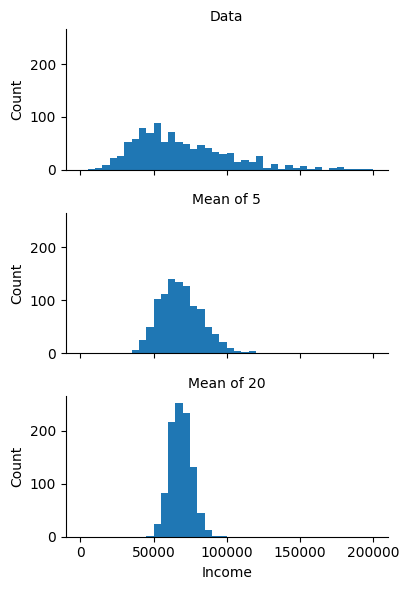

In [21]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

n 제곱근의 법칙 : 표준오차와 표본 크기 사이의 관계에서, 표준오차가 표본크기의 제곱근에 반비례한다.


---


표준오차 = SE = $\frac{s}{\sqrt{n}}$

---

표준오차를 측정할 때 고려할 사항
1. 모집단에서 완전히 새로운 샘플들을 많이 수집한다.
2. 각각의 새 샘플에 대해 통계량을 계산한다.
3. 2단계에서 얻은 통계량의 표준편차를 계산한다. 이를 표준오차의 추정치로 사용한다.



##주요개념
- 표본통계량의 도수분포는 그 해당 지표가 표본마다 다르게 나타날 수 있음을 보여준다.
- 부트스트랩 방식 혹은 중심극한정리에 의존하는 공식을 통해 포본분포를 추정할 수 있다.
- 표준오차는 표본통계량의 변동성을 요약하는 주요 지표이다.